In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from UnarySim.sw.kernel.relu import UnaryReLU
from UnarySim.sw.bitstream.gen import RNG, SourceGen, BSGen
from UnarySim.sw.metric.metric import ProgressiveError
import matplotlib.pyplot as plt
import time


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# device = "cuda:0"
device = "cpu"

In [4]:
a = torch.nn.Parameter(torch.ge(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]])), requires_grad=False)

In [5]:
print(a)

Parameter containing:
tensor([[ True,  True],
        [False,  True]])


In [6]:
a.data = a.data.type(torch.float)

In [7]:
a

Parameter containing:
tensor([[1., 1.],
        [0., 1.]])

In [10]:
rng = "Sobol"
# rng = "Race"

in_dim = 1024

mode = "bipolar"

uReLU = UnaryReLU(buf_dep=4).to(device)

bitwidth = 8

iVec = ((torch.rand(in_dim)*(2**bitwidth)).round()/(2**bitwidth) - 0.5).to(device)
oVec = torch.nn.ReLU()(iVec)
print(iVec)
print(oVec)
        
iVecSource = SourceGen(iVec, bitwidth=bitwidth, mode=mode)().to(device)

iVecRNG = RNG(bitwidth, 1, rng)().to(device)
iVecBS = BSGen(iVecSource, iVecRNG).to(device)

iVecPE = ProgressiveError(iVec, mode=mode).to(device)
oVecPE = ProgressiveError(oVec, mode=mode).to(device)

with torch.no_grad():
    idx = torch.zeros(iVecSource.size()).type(torch.long).to(device)
    start_time = time.time()
    for i in range((2**bitwidth)):
        iBS = iVecBS(idx + i)
        iVecPE.Monitor(iBS)

        oVecU = uReLU(iBS)
        oVecPE.Monitor(oVecU)
        print(i)
        print(iBS)
        print(uReLU.acc.data)
        print(oVecU)

    print("--- %s seconds ---" % (time.time() - start_time))
    print("final input error: ", min(iVecPE()[1]), max(iVecPE()[1]))
    print("final output error:", min(oVecPE()[1]), max(oVecPE()[1]))
    print(oVec)
    print("final output pp:", oVecPE()[0].data)
    print("final output pe:", oVecPE()[1].data)
    
    result_pe = oVecPE()[1][0].cpu().numpy()
    print(torch.sqrt(torch.sum(torch.mul(oVecPE()[1], oVecPE()[1]))))
    print(result_pe)

tensor([ 0.3477,  0.1562,  0.1289,  ..., -0.4297,  0.0312,  0.0000])
tensor([0.3477, 0.1562, 0.1289,  ..., 0.0000, 0.0312, 0.0000])
0
tensor([1, 1, 1,  ..., 0, 1, 0], dtype=torch.uint8)
tensor([9, 9, 9,  ..., 7, 9, 7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 0, 1, 0], dtype=torch.uint8)
1
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([8, 8, 8,  ..., 6, 8, 6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8)
2
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([9, 9, 9,  ..., 7, 9, 7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
3
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([10, 10, 10,  ...,  6, 10,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
4
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([9, 9, 9,  ..., 5, 9, 7], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8)
5
tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([10,  8,  8

tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 13, 12,  ...,  2,  8,  6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8)
50
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([15, 14, 13,  ...,  1,  9,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
51
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([15, 15, 14,  ...,  0, 10,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
52
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 14, 13,  ..., 15,  9,  7], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8)
53
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([13, 13, 12,  ..., 14,  8,  6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 0, 0, 1], dtype=torch.uint8)
54
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([14, 14, 13,  ..., 15,  9,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
55
tensor([1,

tensor([15, 15, 15,  ..., 12,  9,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
99
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ..., 11, 10,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
100
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 14, 14,  ..., 10,  9,  7], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
101
tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([15, 13, 13,  ...,  9,  8,  6], dtype=torch.uint8)
tensor([1, 0, 0,  ..., 0, 0, 1], dtype=torch.uint8)
102
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 14, 14,  ..., 10,  9,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
103
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ..., 11, 10,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
104
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tenso

tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
148
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 14, 14,  ...,  4, 13,  7], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8)
149
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([13, 13, 13,  ...,  3, 12,  6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8)
150
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([14, 14, 14,  ...,  4, 13,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
151
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ...,  5, 14,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
152
tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([15, 14, 14,  ...,  4, 13,  7], dtype=torch.uint8)
tensor([1, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8)
153
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 13, 13,  ...,  3, 12,  6], dtype=torch.uint8)
tens

tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([15, 13, 13,  ..., 11, 12,  6], dtype=torch.uint8)
tensor([1, 0, 0,  ..., 0, 0, 1], dtype=torch.uint8)
198
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 14, 14,  ..., 12, 13,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
199
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ..., 13, 14,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
200
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 14, 14,  ..., 12, 13,  7], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
201
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([13, 13, 13,  ..., 11, 12,  6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 0, 0, 1], dtype=torch.uint8)
202
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([14, 14, 14,  ..., 10, 13,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
203
tens

tensor([14, 14, 14,  ...,  2, 13,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
247
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ...,  3, 14,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
248
tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([15, 14, 14,  ...,  2, 13,  7], dtype=torch.uint8)
tensor([1, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8)
249
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tensor([14, 13, 13,  ...,  1, 12,  6], dtype=torch.uint8)
tensor([0, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8)
250
tensor([1, 1, 1,  ..., 0, 1, 1], dtype=torch.uint8)
tensor([15, 14, 14,  ...,  0, 13,  7], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
251
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
tensor([15, 15, 15,  ...,  1, 14,  8], dtype=torch.uint8)
tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8)
252
tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)
tens

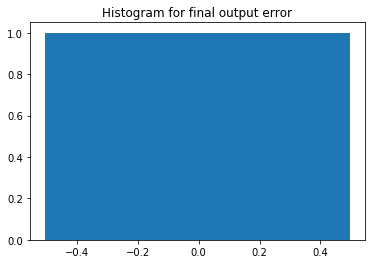

In [11]:
fig = plt.hist(result_pe, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for final output error")
plt.show()

In [217]:
# passed test
# 1. unipolar,     scaled,     biased: passed
# 2. unipolar,     scaled, non-biased: passed
# 3. unipolar, non-scaled,     biased: passed
# 4. unipolar, non-scaled, non-biased: passed
# 5.  bipolar,     scaled,     biased: passed
# 6.  bipolar,     scaled, non-biased: passed
# 7.  bipolar, non-scaled,     biased: passed
# 8.  bipolar, non-scaled, non-biased: passed